In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import numpy.random as npr
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:20,.2f}'.format

In [3]:
russell = pd.read_csv('^RUT.csv',low_memory=False,index_col='Date', parse_dates=['Date'])
russell.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-10-05,417.04,417.04,407.48,414.97,414.97,13017000
2001-10-08,414.97,415.13,410.25,412.18,412.18,9790000
2001-10-09,412.18,412.27,407.87,408.68,408.68,12278000


In [4]:
russell.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)

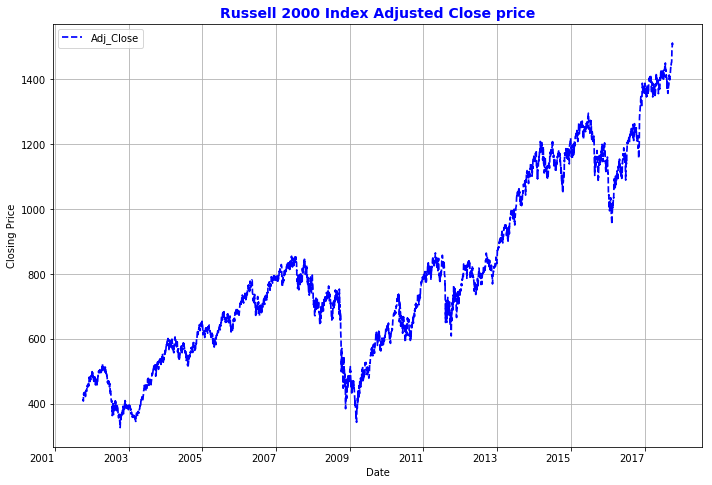

In [10]:
plt.figure(figsize = (10,7))
russell['Adj_Close'].plot(color = 'b', alpha = 1, lw = 1.7, style = '--')
plt.xlabel('Date')
plt.grid(True)
plt.axis('tight')
plt.ylabel('Closing Price')
plt.title('Russell 2000 Index Adjusted Close price',size= 14, weight = 'bold', color = 'blue')
plt.legend()
plt.tight_layout()
plt.xticks(rotation = 0)
plt.show()

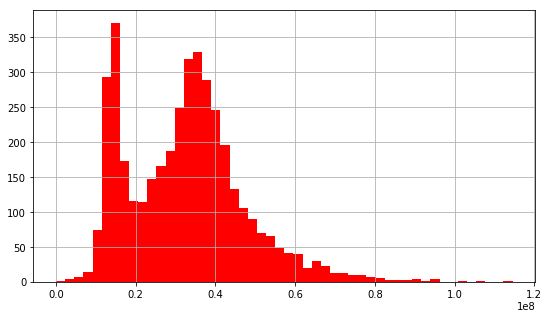

In [11]:
plt.figure(figsize = (9,5))
plt.hist(russell.Volume, bins = 50, color = 'red')
plt.grid()
plt.show()

In [12]:
russell.describe()

,Open,High,Low,Close,Adj_Close,Volume
count,"4,029.00","4,029.00","4,029.00","4,029.00","4,029.00","4,029.00"
mean,798.75,804.39,792.64,798.98,798.98,"32,425,543.71"
std,281.91,282.54,281.25,282.02,282.02,"14,767,209.21"
min,327.04,336.18,324.90,327.04,327.04,0.00
25%,589.49,594.77,584.64,589.40,589.40,"19,762,700.00"
50%,738.44,744.82,732.61,738.86,738.86,"32,854,600.00"
75%,"1,046.64","1,052.10","1,040.79","1,046.08","1,046.08","40,592,800.00"
max,"1,512.00","1,514.94","1,508.34","1,512.09","1,512.09","114,562,300.00"


In [13]:
russell['252_day_average'] = russell.Open - russell.Close / 252

### SImple Financial Metric Applied

In [14]:
russell.Close.max()

1512.089966

In [15]:
russell.Close.min()

327.040009

In [16]:
russell.Open.argmax()

Timestamp('2017-10-04 00:00:00')

In [17]:
russell.Close.argmin()

Timestamp('2002-10-09 00:00:00')

In [18]:
russell.Close.idxmax()

Timestamp('2017-10-05 00:00:00')

In [19]:
russell.Close.idxmin()

Timestamp('2002-10-09 00:00:00')

In [20]:
russell.Close.std()

282.0225745440716

In [21]:
russell.Close.kurt()

-0.6944633107358067

In [22]:
russell.Close.mean()

798.9836984681086

In [23]:
russell.Close.mode()

0                 570.74
1                 609.49
2               1,161.86
3               1,167.21
dtype: float64

In [24]:
russell.Close.median()

738.8599849999999

In [25]:
russell.Close.var()

79536.73255246642

In [26]:
russell.Close.skew()

0.5436399948811714

In [27]:
russell.Adj_Close.sum()

3219105.3211279996

In [28]:
russell.Close.cumsum().tail(3)

Date
2017-10-03           3,216,085.47
2017-10-04           3,217,593.23
2017-10-05           3,219,105.32
Name: Close, dtype: float64

In [29]:
russell.groupby(['Adj_Close','Close']).mean().head()

,,Open,High,Low,Volume,252_day_average
Adj_Close,Close,,,,,
327.04,327.04,340.32,340.32,326.88,"18,850,300.00",339.02
336.18,336.18,327.04,336.18,324.90,"20,902,300.00",325.71
338.29,338.29,347.98,347.98,337.57,"15,765,000.00",346.64
340.32,340.32,338.29,341.04,333.77,"19,384,300.00",336.94
343.26,343.26,348.85,355.05,342.59,"72,773,200.00",347.49


In [30]:
search = russell['High'] < 1000
search.head()

Date
2001-10-05    True
2001-10-08    True
2001-10-09    True
2001-10-10    True
2001-10-11    True
Name: High, dtype: bool

In [35]:
russell['Log Return'] = np.log(russell['Adj_Close'] / russell['Adj_Close'].shift(1))

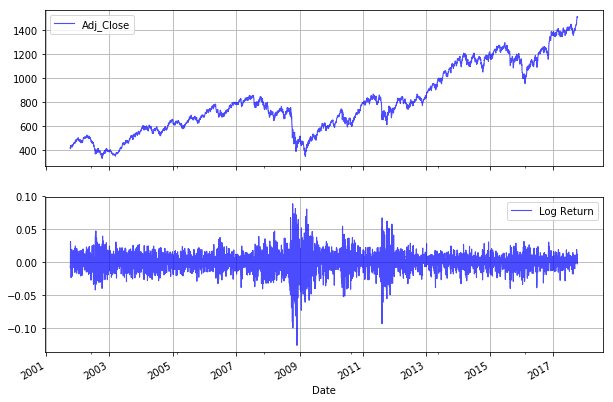

In [36]:
russell[['Adj_Close','Log Return']].plot(subplots = True, style = 'b', grid = True, lw = 1.1, alpha = 0.7,
                                  legend = 'best', figsize = (10, 7))
plt.show()